#  DRIL Classification Notebook
Ce notebook compare 3 modèles (ResNet18, MobileNetV2, EfficientNetB0) sur l dataset d'images OCT pour détecter la présence ou non de DRIL.

In [ ]:
#  Installer les dépendances si besoin
# !pip install torch torchvision timm scikit-learn pandas matplotlib


In [ ]:
!mkdir -p /content/dataset/images


In [ ]:
!mkdir -p /content/images_malade

In [ ]:
!mkdir -p /content/images_sans_dis

In [ ]:
!mkdir -p /content/OCTimages_TO_324_MARCH_2025

In [ ]:
import os
import pandas as pd

# === paramètres ===
folder = "/content/images_sans_dis"
label_value = 0                 # 0 = rétine saine

# === extensions acceptées ===
IMG_EXTS = {".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff", ".webp"}
rows = []

# Parcours du dossier
for root, _, files in os.walk(folder):
    for f in files:
        ext = os.path.splitext(f)[1].lower()
        if ext in IMG_EXTS:
            rows.append({"image_name": f, "label": label_value})

# Création du DataFrame
df = pd.DataFrame(rows).sort_values("image_name").reset_index(drop=True)

# Export en CSV
output_csv = "images_sans_dis.csv"
df.to_csv(output_csv, index=False)

print(f" CSV créé avec {len(df)} lignes → {output_csv}")
df.head()


 CSV créé avec 1000 lignes → images_sans_dis.csv


,image_name,label
0,OCT_00022.jpeg,0
1,OCT_00027.jpeg,0
2,OCT_00031.jpeg,0
3,OCT_00043.jpeg,0
4,OCT_00065.jpeg,0


In [ ]:
import os
import pandas as pd

# === paramètres ===
folder = "/content/images_malade"
label_value = 1               # 0 = rétine saine

# === extensions acceptées ===
IMG_EXTS = {".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff", ".webp"}
rows = []

# Parcours du dossier
for root, _, files in os.walk(folder):
    for f in files:
        ext = os.path.splitext(f)[1].lower()
        if ext in IMG_EXTS:
            rows.append({"image_name": f, "label": label_value})

# Création du DataFrame
df = pd.DataFrame(rows).sort_values("image_name").reset_index(drop=True)

# Export en CSV
output_csv = "images_dis.csv"
df.to_csv(output_csv, index=False)

print(f" CSV créé avec {len(df)} lignes → {output_csv}")
df.head()


 CSV créé avec 1152 lignes → images_dis.csv


,image_name,label
0,OCT_00009.jpeg,1
1,OCT_00010.jpeg,1
2,OCT_00011.jpeg,1
3,OCT_00012.jpeg,1
4,OCT_00013.jpeg,1


In [ ]:
import pandas as pd

# Chemins des fichiers CSV
csv_drill = "/content/images_dis.csv"
csv_saine = "/content/images_sans_dis.csv"
#csv_mixte =  "/content/DRIL_DATASET_TO_324_MARCH_2025_v1.csv"

# Lecture des CSV
df_drill = pd.read_csv(csv_drill)
df_saine = pd.read_csv(csv_saine)
#df_mixte = pd.read_csv(csv_mixte)

# Fusion
df_all = pd.concat([df_drill, df_saine], ignore_index=True) ## df_mixte a remettre pour l adrill

# Suppression des doublons si nécessaire
df_all = df_all.drop_duplicates(subset=["image_name"])

# Sauvegarde
output_csv = "labels.csv"
df_all.to_csv(output_csv, index=False)

print(f" Fichier fusionné enregistré → {output_csv}")
print(f"Nombre total d'images : {len(df_all)}")
print(df_all.head())


 Fichier fusionné enregistré → labels.csv
Nombre total d'images : 2152
       image_name  label
0  OCT_00009.jpeg      1
1  OCT_00010.jpeg      1
2  OCT_00011.jpeg      1
3  OCT_00012.jpeg      1
4  OCT_00013.jpeg      1


In [ ]:
import os
import shutil


folders = [
    "images_malade",
    "images_sans_dis",

] # "OCTimages_TO_324_MARCH_2025"

# Dossier cible
target_dir = "dataset/images"
os.makedirs(target_dir, exist_ok=True)

# Extensions valides
IMG_EXTS = {".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff", ".webp"}

# Fonction pour éviter les collisions de noms
def unique_name(target_folder, filename):
    name, ext = os.path.splitext(filename)
    new_name = filename
    counter = 1
    while os.path.exists(os.path.join(target_folder, new_name)):
        new_name = f"{name}__{counter}{ext}"
        counter += 1
    return new_name

count_moved = 0

for folder in folders:
    if not os.path.isdir(folder):
        print(f" Dossier introuvable : {folder}")
        continue
    files = [f for f in os.listdir(folder) if os.path.splitext(f)[1].lower() in IMG_EXTS]
    print(f"{folder} contient {len(files)} images valides")

    for file in os.listdir(folder):
        ext = os.path.splitext(file)[1].lower()
        if ext in IMG_EXTS:
            src_path = os.path.join(folder, file)
            new_name = unique_name(target_dir, file)
            dst_path = os.path.join(target_dir, new_name)

            shutil.move(src_path, dst_path)  # déplace le fichier
            count_moved += 1

print(f" {count_moved} images déplacées dans {target_dir}")


images_malade contient 1152 images valides
images_sans_dis contient 1000 images valides
 2152 images déplacées dans dataset/images


In [ ]:
import os
import shutil
import pandas as pd

# === Paramètres ===
csv_labels = "dataset/labels.csv"  # ton fichier CSV avec les images annotées
images_dir = "dataset/images"                 # dossier contenant toutes les images
output_dir = "dataset/non_annotated_images"   # dossier pour images non annotées

# Charger le CSV
df = pd.read_csv(csv_labels)
annotated_set = set(df["image_name"].tolist())

# Créer le dossier cible
os.makedirs(output_dir, exist_ok=True)

moved_count = 0
kept_count = 0

# Parcourir les images
for img in os.listdir(images_dir):
    img_path = os.path.join(images_dir, img)
    if not os.path.isfile(img_path):
        continue
    if img not in annotated_set:
        # Déplacer vers non_annotated_images
        shutil.move(img_path, os.path.join(output_dir, img))
        moved_count += 1
    else:
        kept_count += 1

print(f" {kept_count} images gardées dans {images_dir}")
print(f" {moved_count} images déplacées dans {output_dir}")


 877 images gardées dans dataset/images
 170 images déplacées dans dataset/non_annotated_images


In [ ]:
import pandas as pd

# Charger les fichiers CSV
labels_df = pd.read_csv("dataset/labels.csv")
drill_df = pd.read_csv("dataset/images_Drill.csv")

# Normaliser les noms de colonnes
labels_df.columns = labels_df.columns.str.strip().str.lower()
drill_df.columns = drill_df.columns.str.strip().str.lower()

# Créer les ensembles
labels_images = set(labels_df["image_name"])
drill_images = set(drill_df["image_name"])

# Chercher celles qui sont dans drill mais pas dans labels
images_missing_in_labels = sorted(drill_images - labels_images)

# Sauvegarder en TXT
with open("images_missing_in_labels.txt", "w") as f:
    for img in images_missing_in_labels:
        f.write(f"{img}\n")

print(f" {len(images_missing_in_labels)} images trouvées et enregistrées dans images_missing_in_labels.txt")


 0 images trouvées et enregistrées dans images_missing_in_labels.txt


In [ ]:
!zip -r dataset.zip dataset


  adding: dataset/ (stored 0%)
  adding: dataset/images/ (stored 0%)
  adding: dataset/images/026_2_B.jpg (deflated 0%)
  adding: dataset/images/OCT_00062.jpeg (deflated 0%)
  adding: dataset/images/OCT_04070.jpeg (deflated 4%)
  adding: dataset/images/OCT_07214.jpeg (deflated 3%)
  adding: dataset/images/OCT_00022.jpeg (deflated 5%)
  adding: dataset/images/OCT_00611.jpeg (deflated 5%)
  adding: dataset/images/OCT_02156.jpeg (deflated 3%)
  adding: dataset/images/OCT_00304.jpeg (deflated 4%)
  adding: dataset/images/OCT_06692.jpeg (deflated 3%)
  adding: dataset/images/OCT_08889.jpeg (deflated 0%)
  adding: dataset/images/011_2_T.jpg (deflated 0%)
  adding: dataset/images/OCT_07581.jpeg (deflated 2%)
  adding: dataset/images/OCT_02439.jpeg (deflated 4%)
  adding: dataset/images/017_1_B.jpg (deflated 0%)
  adding: dataset/images/020_3_T.jpg (deflated 0%)
  adding: dataset/images/006_1_B.jpg (deflated 0%)
  adding: dataset/images/OCT_00635.jpeg (deflated 5%)
  adding: dataset/images/OCT

In [ ]:
from google.colab import files
files.download("dataset.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from torchvision import transforms, models
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch
from PIL import Image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
#  Préparer les chemins
CSV_PATH = "/content/dataset/labels.csv"
IMG_DIR = "/content/dataset/images"


In [ ]:
#  Charger le fichier CSV (image,label)
df = pd.read_csv(CSV_PATH)
df['image_name'] = df['image_name'].astype(str)
df['label'] = df['label'].astype(int)
df.head()


,image_name,label
0,OCT_00009.jpeg,1
1,OCT_00010.jpeg,1
2,OCT_00011.jpeg,1
3,OCT_00012.jpeg,1
4,OCT_00013.jpeg,1


In [ ]:
import os
import pandas as pd

CSV_PATH = "/content/dataset/labels.csv"
IMG_DIR = "/content/dataset/images"

# Charger le CSV
df = pd.read_csv(CSV_PATH)

# Vérifier la colonne qui contient les noms (adapte si c’est "filename" ou "image_name")
col_name = "image_name"  # ou "filename"

missing_files = []
for img_name in df[col_name]:
    path = os.path.join(IMG_DIR, img_name)
    if not os.path.isfile(path):
        missing_files.append(img_name)

if missing_files:
    print(f"{len(missing_files)} images manquantes :")
    print(missing_files[:20])  # afficher seulement les 20 premières
else:
    print(" Toutes les images du CSV existent dans le dossier.")


 Toutes les images du CSV existent dans le dossier.


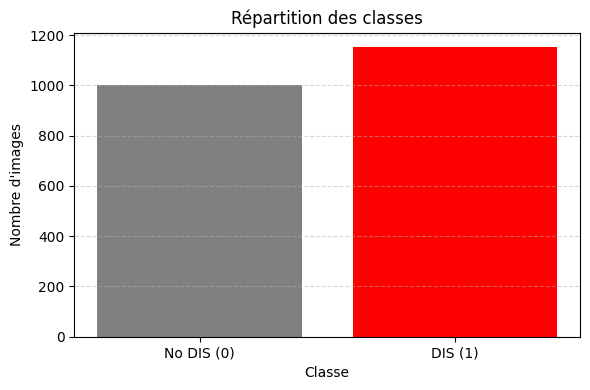

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV
df = pd.read_csv("/content/dataset/labels.csv")

# Compter le nombre d'images par classe
class_counts = df['label'].value_counts().sort_index()

# Afficher les barres
plt.figure(figsize=(6, 4))
plt.bar(['No DIS (0)', 'DIS (1)'], class_counts, color=['gray', 'red'])
plt.title("Répartition des classes")
plt.ylabel("Nombre d'images")
plt.xlabel("Classe")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv("/content/dataset/labels.csv")

# Comptage par classe
counts = df['label'].value_counts()
print("Distribution des classes :")
print(counts)

# Équilibrage simple : combien il en manque ?
nb_no_dril = counts.get(0, 0)
nb_dril = counts.get(1, 0)

manque = nb_no_dril - nb_dril
print(f"\nIl manque {manque} images no DIS pour équilibrer.")


Distribution des classes :
label
1    1152
0    1000
Name: count, dtype: int64

Il manque -152 images no DIS pour équilibrer.


In [ ]:
import pandas as pd

df = pd.read_csv("/content/dataset/labels.csv")



In [ ]:
print("Distribution des classes :")
print(df['label'].value_counts())


Distribution des classes :
label
1    1152
0    1000
Name: count, dtype: int64


 **Séparation du dataset en deux parties : entraînement et test**
 - 80 % des données sont utilisées pour entraîner le modèle (train_df)
 - 20 % sont utilisées pour l’évaluer sur des images jamais vues (test_df)
 - La séparation conserve le même ratio de classes (stratification)
 - random_state garantit que la séparation reste la même à chaque exécution

In [ ]:
#  Séparation train/test 20% test 80% entrainement
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)


**cellule de sanity-check**

In [ ]:
# ===== SANITY CHECK train/test + fichiers + accès images =====
import os
from collections import Counter
from PIL import Image

# 1) Tailles et répartition des classes
print(f"Train: {len(train_df)} images  |  Test: {len(test_df)} images")
print("Répartition TRAIN:", Counter(train_df['label']))
print("Répartition TEST :", Counter(test_df['label']))

# 2) Aperçu des 5 premières lignes (pour vérifier les noms de fichiers / labels)
print("\nAperçu TRAIN:")
display(train_df.head())
print("\nAperçu TEST:")
display(test_df.head())

# 3) Vérifier l'existence des fichiers (liste les manquants si besoin)
def missing_files(df, img_dir, max_show=15):
    miss = []
    for name in df['image_name'].tolist():
        path = os.path.join(img_dir, name)
        if not os.path.isfile(path):
            miss.append(name)
    if miss:
        print(f"\nFichiers manquants: {len(miss)}")
        for m in miss[:max_show]:
            print(" -", m)
        if len(miss) > max_show:
            print(f"... (+{len(miss)-max_show} autres)")
    else:
        print("\n Aucun fichier manquant.")

missing_files(train_df, IMG_DIR)
missing_files(test_df, IMG_DIR)

# 4) Essayer d'ouvrir quelques images (pour confirmer la lecture)
def try_open(df, img_dir, k=3):
    ok = 0
    for _, row in df.sample(min(k, len(df)), random_state=42).iterrows():
        p = os.path.join(img_dir, row['image_name'])
        try:
            with Image.open(p) as im:
                im.verify()   # vérifie l'intégrité
            print(f" Ouverture OK: {row['image_name']}  (label={row['label']})")
            ok += 1
        except Exception as e:
            print(f" Problème: {row['image_name']} -> {e}")
    if ok == 0:
        print(" Aucune image ouverte avec succès (vérifie le chemin IMG_DIR).")

print("\nTEST d'ouverture TRAIN:")
try_open(train_df, IMG_DIR)
print("\nTEST d'ouverture TEST:")
try_open(test_df, IMG_DIR)

# 5) Test rapide DataLoader (1 batch) pour vérifier que tout passe au modèle
from itertools import islice
model.eval()
with torch.no_grad():
    try:
        batch = next(iter(train_loader))
        imgs, labs = batch
        print(f"\nBatch TRAIN -> imgs: {tuple(imgs.shape)}, labels: {tuple(labs.shape)}")
        imgs = imgs.to(device); labs = labs.to(device).unsqueeze(1).float()
        out = model(imgs)
        print(" Forward pass OK sur 1 batch:", tuple(out.shape))
    except Exception as e:
        print(" Erreur DataLoader / forward pass:", e)

# 6) (Optionnel) Sauver les splits pour inspection
train_df.to_csv("split_train.csv", index=False)
test_df.to_csv("split_test.csv", index=False)
print("\nFichiers sauvegardés: split_train.csv, split_test.csv")


Train: 1721 images  |  Test: 431 images
Répartition TRAIN: Counter({1: 921, 0: 800})
Répartition TEST : Counter({1: 231, 0: 200})

Aperçu TRAIN:


,image_name,label
640,OCT_06719.jpeg,1
1039,OCT_08955.jpeg,1
100,OCT_00452.jpeg,1
124,OCT_00663.jpeg,1
25,OCT_00242.jpeg,1



Aperçu TEST:


,image_name,label
1541,OCT_03435.jpeg,0
1041,OCT_08957.jpeg,1
140,OCT_00733.jpeg,1
1063,OCT_08980.jpeg,1
1924,OCT_07223.jpeg,0



 Aucun fichier manquant.

 Aucun fichier manquant.

TEST d'ouverture TRAIN:
 Ouverture OK: OCT_07069.jpeg  (label=1)
 Ouverture OK: OCT_05999.jpeg  (label=1)
 Ouverture OK: OCT_08562.jpeg  (label=1)

TEST d'ouverture TEST:
 Ouverture OK: OCT_08395.jpeg  (label=1)
 Ouverture OK: OCT_07189.jpeg  (label=1)
 Ouverture OK: OCT_00406.jpeg  (label=1)


NameError: name 'model' is not defined

**Cellule 1 — Imports, reset, seed, device**
On importe les librairies.

On efface les fichiers de runs précédents.

On fixe une “graine” pour avoir toujours les mêmes résultats.

On choisit GPU si dispo.

In [ ]:
import os, random, numpy as np, torch, torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
from PIL import Image
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# reset : on efface les anciens fichiers de sauvegarde
for f in ["resnet18_best.pth", "final_summary.json"]:
    if os.path.exists(f):
        os.remove(f)

# reproducibilité
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

# GPU si dispo
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.backends.cudnn.benchmark = True


**Dataset + transformations + DataLoaders**

DRILDataset : lit une image (image_name), la convertit en RGB, renvoie (image, label).

train_tf : augmentation (flip, petite rotation, jitter) + normalisation ImageNet
→ aide à généraliser (moins d’overfitting).
t
DataLoader :

shuffle=True pour mélanger le train à chaque epoch,

pin_memory utile sur GPU pour des transferts plus rapides.

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

# === Dataset personnalisé ===
class DRILDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df.reset_index(drop=True)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        image_path = os.path.join(self.img_dir, row['image_name'])
        image = Image.open(image_path).convert("RGB")
        label = torch.tensor(row['label'], dtype=torch.float32)
        if self.transform:
            image = self.transform(image)
        return image, label


from torchvision.transforms import InterpolationMode
train_tf = transforms.Compose([
    transforms.RandomResizedCrop(
        224, scale=(0.9, 1.0), ratio=(0.97, 1.03),
        interpolation=InterpolationMode.BILINEAR, antialias=True
    ),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=8, interpolation=InterpolationMode.BILINEAR),
    transforms.ColorJitter(brightness=0.10, contrast=0.10),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 0.7)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]),
    transforms.RandomErasing(p=0.10, scale=(0.02, 0.05), ratio=(0.3, 3.3), inplace=True),
])

test_tf = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]),
])

# === Jeux de données & DataLoaders ===
train_set = DRILDataset(train_df, IMG_DIR, transform=train_tf)
test_set  = DRILDataset(test_df,  IMG_DIR, transform=test_tf)

BATCH_SIZE = 32
PIN = (DEVICE.type == "cuda")

train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True,
                          num_workers=2, pin_memory=PIN)
test_loader  = DataLoader(test_set,  batch_size=BATCH_SIZE, shuffle=False,
                          num_workers=2, pin_memory=PIN)


**Modèle ResNet18 + Dropout (tête binaire)**

ré‑entraînement ImageNet : on réutilise des filtres “généraux” (bords, textures) → apprend plus vite, mieux.

Remplacement de fc : ImageNet a 1000 classes ; nous on veut binaire ⇒ Linear(..., 1).

Dropout(0.5) : éteint aléatoirement 50% des neurones de la tête pendant le train → moins d’overfitting.

Sortie = 1 logit : on n’applique pas la sigmoid ici, la loss le fera de façon stable.

In [ ]:
from torchvision import models
import torch.nn as nn

def get_resnet18_with_dropout(p_drop=0.5):
    # 1) Charger ResNet18 pré‑entraîné sur ImageNet
    model = models.resnet18(weights="IMAGENET1K_V1")

    # 2) Remplacer la couche finale (fc) pour la classification binaire
    in_features = model.fc.in_features
    model.fc = nn.Sequential(
        nn.Dropout(p=p_drop),   # régularisation pour réduire l’overfitting
        nn.Linear(in_features, 1)  # 1 logit → BCEWithLogitsLoss appliquera la sigmoid 0.5
    )

    return model.to(DEVICE)

model = get_resnet18_with_dropout(p_drop=0.6)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 206MB/s]


**Loss (BCE), Optimizer (AdamW), Scheduler (Warm‑up ➜ Cosine)**

**BCEWithLogitsLoss** : perte standard binaire (la sigmoid est gérée dedans).

**AdamW** : optimiseur robuste + weight_decay (L2) ↓ sur‑apprentissage.

**Warm‑up** : démarre doucement (10% du LR) pendant warmup_epochs, protège les poids pré‑entraînés.

**Cosine** : puis ralentit progressivement le LR jusqu’à base_lr × 1e-2 pour stabiliser la fin d’entraînement.

In [ ]:
import torch
from torch.optim import AdamW
from torch.optim.lr_scheduler import LambdaLR, SequentialLR, CosineAnnealingLR

# === Hyperparamètres de base ===
EPOCHS = 30
warmup_epochs = 3           # nb d'epochs pour le warm-up
base_lr = 3e-4              # learning rate "cible"
weight_decay = 5e-4         # L2 régularisation (anti-overfitting)1e-4
min_lr_ratio = 1e-2         # LR minimum = base_lr * 1e-2 en fin de cosine

# === Perte binaire avec logits ===
criterion = nn.BCEWithLogitsLoss()

# === Optimiseur AdamW (avec L2 via weight_decay) ===
optimizer = AdamW(model.parameters(), lr=base_lr, weight_decay=weight_decay)

# === Scheduler: Warm-up puis Cosine ===
def warmup_lambda(epoch):
    # Démarre à 10% du LR, puis monte linéairement jusqu'à 100% sur warmup_epochs
    start = 0.1
    return start + (1.0 - start) * float(epoch + 1) / float(max(1, warmup_epochs))

warmup_scheduler = LambdaLR(optimizer, lr_lambda=warmup_lambda)

tmax_cosine = max(1, EPOCHS - warmup_epochs)
cosine_scheduler = CosineAnnealingLR(
    optimizer,
    T_max=tmax_cosine,
    eta_min=base_lr * min_lr_ratio
)

scheduler = SequentialLR(
    optimizer,
    schedulers=[warmup_scheduler, cosine_scheduler],
    milestones=[warmup_epochs]  # bascule vers cosine après le warm-up
)

# (petit utilitaire debug si on veux imprimer le LR après chaque epoch)
def current_lr(opt):
    return opt.param_groups[0]['lr']


**Split validation figée (10%) + DataLoaders dédiés**

Validation figée = toujours les mêmes images pour juger les epochs → métrique stable et comparable.

Train vs Val :

Train → avec data augmentation (robustesse).

Val → sans augmentation (mesure propre).

Ces loaders sont utilisés uniquement pour le early stopping (prochaine cellule).

In [ ]:
import numpy as np

VAL_IDX_PATH = "val_idx.npy"

# Indices de tout le train
all_idx  = np.arange(len(train_df))
val_size = max(1, int(0.10 * len(all_idx)))  # 10% pour la validation

# On réutilise toujours les mêmes indices de validation (val figée)
if os.path.exists(VAL_IDX_PATH):
    val_idx = np.load(VAL_IDX_PATH)
    # Garde‑fou si la taille a changé ou si indices invalides
    if (len(val_idx) != val_size) or (val_idx.max() >= len(train_df)):
        rng = np.random.default_rng(SEED)
        val_idx = rng.choice(all_idx, size=val_size, replace=False)
        np.save(VAL_IDX_PATH, val_idx)
else:
    rng = np.random.default_rng(SEED)
    val_idx = rng.choice(all_idx, size=val_size, replace=False)
    np.save(VAL_IDX_PATH, val_idx)

# Le reste pour l'entraînement
tr_idx = np.setdiff1d(all_idx, val_idx)

# DataFrames séparés
train_df_es = train_df.iloc[tr_idx].reset_index(drop=True)
val_df_es   = train_df.iloc[val_idx].reset_index(drop=True)

# Jeux de données: augmentation pour TRAIN, pas d'augmentation pour VAL
train_subset = DRILDataset(train_df_es, IMG_DIR, transform=train_tf)
val_subset   = DRILDataset(val_df_es,   IMG_DIR, transform=test_tf)

# DataLoaders dédiés au early stopping
train_loader_es = DataLoader(train_subset, batch_size=BATCH_SIZE, shuffle=True,
                             num_workers=2, pin_memory=PIN)
val_loader_es   = DataLoader(val_subset,   batch_size=BATCH_SIZE, shuffle=False,
                             num_workers=2, pin_memory=PIN)

print(f"[LOCK] Validation figée : {len(val_idx)} échantillons (indices -> {VAL_IDX_PATH})")


[LOCK] Validation figée : 172 échantillons (indices -> val_idx.npy)


**Entraînement + Early Stopping (basé sur F1 DRIL)**

evaluate calcule accuracy, F1 de la classe DRIL, precision, recall.

Boucle d’entraînement :

model.train() → passe en mode entraînement (active Dropout).

forward → loss → backward → step.

scheduler.step() à la fin de l’epoch (warm‑up puis cosine).

Validation : on mesure F1 sur val (pas sur train), et on affiche aussi le LR courant (utile).

Early Stopping : si la F1 val n’augmente plus pendant patience epochs → on stop et on garde les meilleurs poids.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch

patience = 3
best_val_f1, patience_left = -1.0, patience
BEST_PATH = "resnet18_best.pth"

def evaluate(loader, mdl):
    """Renvoie: acc, f1_pos, precision_pos, recall_pos, (y_true, y_pred)"""
    mdl.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for imgs, labels in loader:
            imgs = imgs.to(DEVICE)
            labels = labels.to(DEVICE).unsqueeze(1).float()
            logits = mdl(imgs)
            preds = (torch.sigmoid(logits) >= 0.4).long()
            y_true.extend(labels.cpu().numpy().flatten().tolist())
            y_pred.extend(preds.cpu().numpy().flatten().tolist())
    acc = accuracy_score(y_true, y_pred)
    f1p = f1_score(y_true, y_pred, pos_label=1)
    pre = precision_score(y_true, y_pred, pos_label=1, zero_division=0)
    rec = recall_score(y_true, y_pred, pos_label=1)
    return acc, f1p, pre, rec, (y_true, y_pred)

def current_lr(opt):
    return opt.param_groups[0]['lr']

for epoch in range(1, EPOCHS + 1):
    model.train()
    total_loss = 0.0

    for imgs, labels in train_loader_es:
        imgs = imgs.to(DEVICE)
        labels = labels.to(DEVICE).unsqueeze(1).float()

        logits = model(imgs)
        loss = criterion(logits, labels)

        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Scheduler après l'epoch
    scheduler.step()

    # Validation (sans gradients)
    val_acc, val_f1, val_pre, val_rec, _ = evaluate(val_loader_es, model)

    print(f"[Epoch {epoch:02d}] loss={total_loss/len(train_loader_es):.4f} | "
          f"val_acc={val_acc:.4f} val_f1={val_f1:.4f} (P={val_pre:.4f}, R={val_rec:.4f}) | "
          f"LR={current_lr(optimizer):.2e}")

    # Early stopping sur la meilleure F1 (classe DRIL)
    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        patience_left = patience
        torch.save(model.state_dict(), BEST_PATH)
    else:
        patience_left -= 1
        if patience_left <= 0:
            print("Early stopping.")
            break

print(f"\nMeilleur modèle (val_f1={best_val_f1:.4f}) sauvegardé → {BEST_PATH}")


[Epoch 01] loss=0.5903 | val_acc=0.7674 val_f1=0.8077 (P=0.7636, R=0.8571) | LR=2.10e-04
[Epoch 02] loss=0.3907 | val_acc=0.8081 val_f1=0.8520 (P=0.7600, R=0.9694) | LR=3.00e-04


/usr/local/lib/python3.12/dist-packages/torch/optim/lr_scheduler.py:209: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


[Epoch 03] loss=0.3451 | val_acc=0.8023 val_f1=0.8496 (P=0.7500, R=0.9796) | LR=3.00e-04
[Epoch 04] loss=0.2853 | val_acc=0.8314 val_f1=0.8612 (P=0.8108, R=0.9184) | LR=2.99e-04
[Epoch 05] loss=0.2503 | val_acc=0.8198 val_f1=0.8488 (P=0.8131, R=0.8878) | LR=2.96e-04
[Epoch 06] loss=0.2332 | val_acc=0.7267 val_f1=0.7314 (P=0.8312, R=0.6531) | LR=2.91e-04
[Epoch 07] loss=0.2191 | val_acc=0.8256 val_f1=0.8404 (P=0.8778, R=0.8061) | LR=2.84e-04
Early stopping.

Meilleur modèle (val_f1=0.8612) sauvegardé → resnet18_best.pth


**Charger le meilleur modèle et afficher les rapports TRAIN / TEST**

Si TRAIN ≫ TEST (par ex. F1 train 0.98 vs F1 test 0.75) → overfitting probable.

Si TRAIN ≈ TEST (ex. 0.88 vs 0.85) → généralisation correcte.

Regarde surtout pour la classe DRIL :

Recall (rappel) = proportion de DRIL bien détectées (ne pas rater les positifs).

Precision = parmi ce que le modèle dit “DRIL”, combien sont vrais.

F1 = compromis précision/rappel (score central à suivre).

**Le modèle reconnaît bien les patients sains et il est précis pour les patients malades, mais il oublie encore environ 20 % des cas DRIL. C’est déjà un bon outil d’aide, mais pas encore un outil de dépistage autonome.”**
Est très fiable pour dire qu’un patient n’a pas de DRIL.

Est très précise quand elle dit qu’il y a DRIL, mais elle rate encore 1 patient sur 5 avec DRIL.

Globalement, elle donne la bonne réponse dans 9 cas sur 10.

In [ ]:
from sklearn.metrics import classification_report

# Charger les meilleurs poids (sélectionnés par la meilleure F1 sur la validation)
model.load_state_dict(torch.load("resnet18_best.pth", map_location=DEVICE))
model.eval()

def evaluate_and_report(name, loader):
    _, _, _, _, (y_true, y_pred) = evaluate(loader, model)
    print(f"\n=== Évaluation : {name} ===")
    print(classification_report(y_true, y_pred, target_names=["No DISC", "DISc"]))

# 1) Rapport sur tout le TRAIN (utile pour voir un éventuel overfitting)
evaluate_and_report("TRAIN complet", DataLoader(
    train_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=PIN))

# 2) Rapport sur le TEST (vraie performance en généralisation)
evaluate_and_report("TEST", test_loader)



=== Évaluation : TRAIN complet ===
              precision    recall  f1-score   support

     No DISC       0.93      0.85      0.89       800
        DISc       0.88      0.94      0.91       921

    accuracy                           0.90      1721
   macro avg       0.90      0.89      0.90      1721
weighted avg       0.90      0.90      0.90      1721


=== Évaluation : TEST ===
              precision    recall  f1-score   support

     No DISC       0.85      0.79      0.82       200
        DISc       0.83      0.88      0.86       231

    accuracy                           0.84       431
   macro avg       0.84      0.84      0.84       431
weighted avg       0.84      0.84      0.84       431

